## Что такое звук?
Звук - это волна, которая распространяется в упругих средах (например, воздух, вода, различные твёрдые тела). Проще говоря, это колебания давления, которые наши уши и затем мозг воспринимают как “звук”

И чтобы было менее занудно и более понятно, давайте разбираться со всем этим на конкретном примере.
Как мы уже выяснили, для того чтобы появился звук, нужна колеблющаяся среда. В данном случае этой средой будет воздух вокруг меня. Источником же колебаний станет натянутая струна (до этого момента им были мои голосовые связки).


В реальной жизни звуковая волна — это не идеальная синусоида, а совокупность множества частот (гармоник, обертонов и даже шума). Каждая музыкальная нота или человеческий голос имеет сложный «рисунок» волны

У аналогового звука, который наш мозг воспринимает с помощью барабанной перепонки и внутреннего уха (ДОПОЛНИТЬ/УБРАТЬ), есть следующие основные характеристики:

- Частота (frequency) - определяет высоту звука, измеряется в Герцах (Гц)
- Амплитуда (amplitude) - отвечает за громкость (чем выше амплитуда, тем громче звук)
- Фаза (Phase) - в какой момент “начинается” колебание (волна) относительно определённой точки времени

(Показать пример противофазы?)

In [4]:
import librosa

AUDIO_PATH = "audio/f_bass.mp3"

y, sr = librosa.load(AUDIO_PATH, sr=None)

f"Sample Rate: {sr}"

'Sample Rate: 24000'

### Амплитуда (Amplitude)

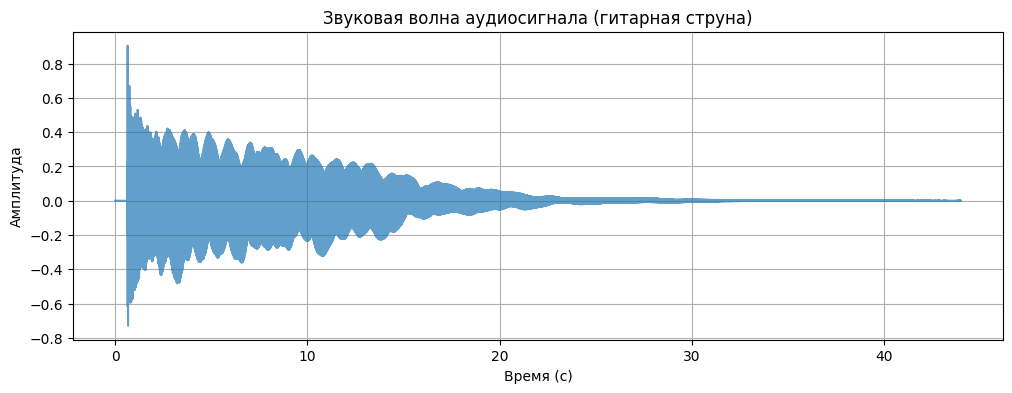

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


t = np.linspace(0, len(y) / sr, num=len(y))

plt.figure(figsize=(12, 4))
plt.plot(t, y, alpha=0.7)
plt.title("Звуковая волна аудиосигнала (гитарная струна)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

Audio(y, rate=sr)

Амплитуда — это максимальное «отклонение» волны от среднего уровня (здесь 0). Чем больше амплитуда, тем «громче» (мощнее) колебания. На графике она соответствует вершинам (пику +1) и впадинам (пику -1) синусоиды.

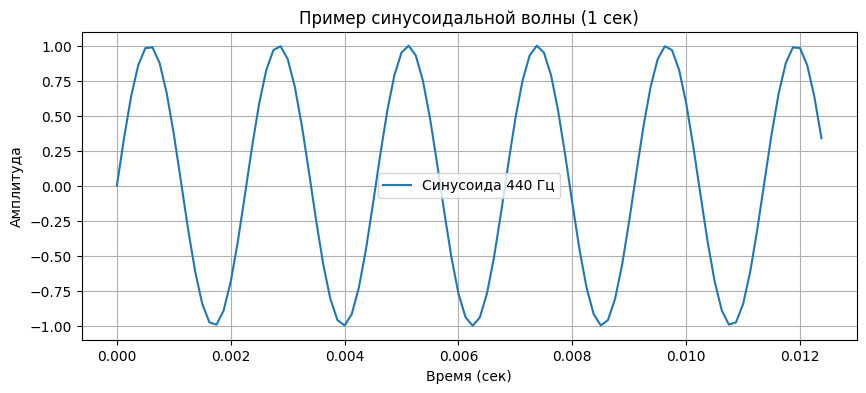

In [8]:
fs = 8000       # Частота дискретизации
f = 440         # Частота звука (Гц)
duration = 2.0  # Длительность сигнала (секунд)

# Формируем вектор времени на основе новых параметров
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Генерируем синусоидальный сигнал
x = np.sin(2 * np.pi * f * t)

# Визуализируем сигнал
plt.figure(figsize=(10, 4))
plt.plot(t[:100], x[:100], label="Синусоида 440 Гц")
plt.title("Пример синусоидальной волны (1 сек)")
plt.xlabel("Время (сек)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()

Audio(x, rate=fs)


### Частота (Frequency)

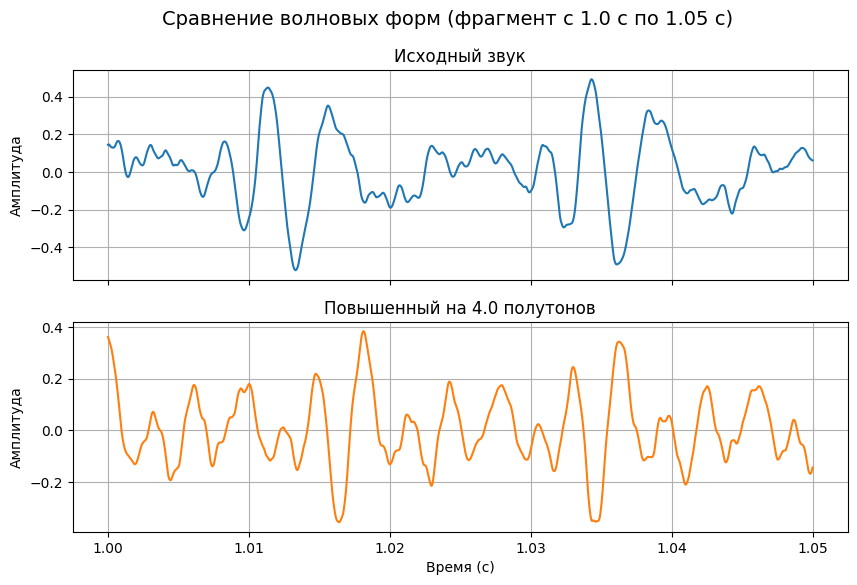

In [20]:
# 2. Повышаем тональность (pitch) на 4 полутона
n_steps_up = 4.0
y_pitch_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps_up)

# 3. Задаём промежуток во времени (start_time -> start_time + duration)
start_time = 1.0        # начнём с 1 секунды
duration = 0.05         # возьмём 0.05 секунд (50 мс) для демонстрации

# Вычислим индексы начала и конца
start_sample = int(start_time * sr)
end_sample = int((start_time + duration) * sr)

# Вырезаем фрагменты из обоих сигналов
y_orig_fragment = y[start_sample:end_sample]
y_pitch_fragment = y_pitch_up[start_sample:end_sample]

# Для временной оси используем linspace, начиная с start_time
t_orig_fragment = np.linspace(
    start_time, 
    start_time + duration,
    num=len(y_orig_fragment),
    endpoint=False
)

# То же самое для pitch-shifted сигнала
t_pitch_fragment = np.linspace(
    start_time, 
    start_time + duration,
    num=len(y_pitch_fragment),
    endpoint=False
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.plot(t_orig_fragment, y_orig_fragment, color='tab:blue')
ax1.set_title("Исходный звук")
ax1.set_ylabel("Амплитуда")
ax1.grid(True)

ax2.plot(t_pitch_fragment, y_pitch_fragment, color='tab:orange')
ax2.set_title(f"Повышенный на {n_steps_up} полутонов")
ax2.set_xlabel("Время (с)")
ax2.set_ylabel("Амплитуда")
ax2.grid(True)

fig.suptitle(f"Сравнение волновых форм (фрагмент с {start_time} c по {start_time+duration} c)", fontsize=14)
plt.show()


Частота — это то, сколько раз волна повторяет свой цикл в единицу времени (секунду).
1 цикл (полное «вверх-вниз» колебание) = 
𝑇
T секунд = период.
Чем короче 
𝑇
T, тем выше частота (а значит, волна «колеблется» быстрее).
Без спектрограммы мы можем увидеть эту «скорость колебаний» просто посмотрев, как часто синусоида повторяет форму.

## Original Audio

In [21]:
Audio(y, rate=sr)

## Pitched Audio

In [24]:
Audio(y_pitch_up, rate=sr)

Pitched Audio


### Спектрограмма

У оцифрованного звука появляется ещё ряд новых важных для нас характеристик:
- Sample Rate
- Bitrate